# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Note**: This notebook was AI-generated and has not been fully verified. Please interpret the code and results cautiously.

## Overview of Dandiset
The Dandiset **Breathing rhythm and place dataset** (ID: 001433, Version: 0.250507.2356) contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb electrophysiology in freely behaving mice.
Link: https://dandiarchive.org/dandiset/001433/0.250507.2356

**Notebook Contents**
1. Load Dandiset metadata and assets using the DANDI API  
2. Select and load an NWB file from the Dandiset  
3. Inspect NWB file structure and metadata  
4. Visualize LFP and sniff signals  
5. Advanced visualization  
6. Summary and future directions

## Required Packages
The following packages are required and assumed to be installed:
- itertools  
- dandi.dandiapi  
- pynwb  
- h5py  
- remfile  
- numpy  
- pandas  
- matplotlib

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Select and Load NWB File
We select the NWB file from subject 4127 (session at 2025-05-07T15:30:20).
- File path: `sub-4127/sub-4127_ses-20250507T153020_ecephys.nwb`  
- Asset URL: https://api.dandiarchive.org/api/assets/e392479c-8683-4424-a75b-34af512a17a2/download/

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/e392479c-8683-4424-a75b-34af512a17a2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, mode='r')
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


### NWB File Metadata
- Session description: `nwb.session_description`  
- Identifier: `nwb.identifier`  
- Session start time: `nwb.session_start_time`  
- Institution: `nwb.institution`  
- Laboratory: `nwb.lab`  
- Experimenter: `nwb.experimenter`

In [3]:
print("Session description:", nwb.session_description)
print("Identifier:", nwb.identifier)
print("Session start time:", nwb.session_start_time)
print("Institution:", nwb.institution)
print("Laboratory:", nwb.lab)
print("Experimenter:", nwb.experimenter)

Session description: LFP and sniff recording
Identifier: 4127_3
Session start time: 2025-05-07 15:30:20.524799-07:00
Institution: University of Oregon
Laboratory: Smear lab
Experimenter: ('Rafilson, Sidney',)


## NWB File Structure Summary
```
- acquisition
  - LFP (ElectricalSeries)
  - SniffSignal (TimeSeries)
- processing
  - behavior (ProcessingModule)
    - exhalation_time (TimeSeries)
    - inhalation_time (TimeSeries)
- electrodes (DynamicTable)
- electrode_groups (ElectrodeGroup)
- devices (Device)
- subject (Subject)
```

**Explore in NeuroSift:**  
https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/e392479c-8683-4424-a75b-34af512a17a2/download/&dandisetId=001433&dandisetVersion=draft

## Visualize LFP and Sniff Signals
We load a subset of data for efficiency (first 10,000 samples).

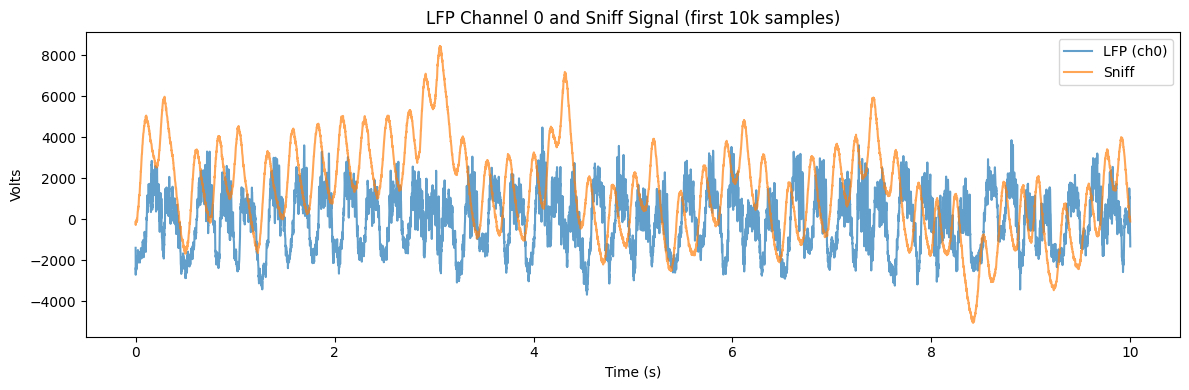

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Access time series
LFP = nwb.acquisition["LFP"]
Sniff = nwb.acquisition["SniffSignal"]

# Subset data
n_samples = 10000
lfp_data = LFP.data[:n_samples, 0]
lfp_times = np.arange(n_samples) / LFP.rate

sniff_data = Sniff.data[:n_samples]
sniff_times = np.arange(n_samples) / Sniff.rate

# Plot
plt.figure(figsize=(12, 4))
plt.plot(lfp_times, lfp_data, label='LFP (ch0)', alpha=0.7)
plt.plot(sniff_times, sniff_data, label='Sniff', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Volts')
plt.title('LFP Channel 0 and Sniff Signal (first 10k samples)')
plt.legend()
plt.tight_layout()
plt.show()

## Advanced Visualization
Example: Plot the first 4 LFP channels in stacked traces.

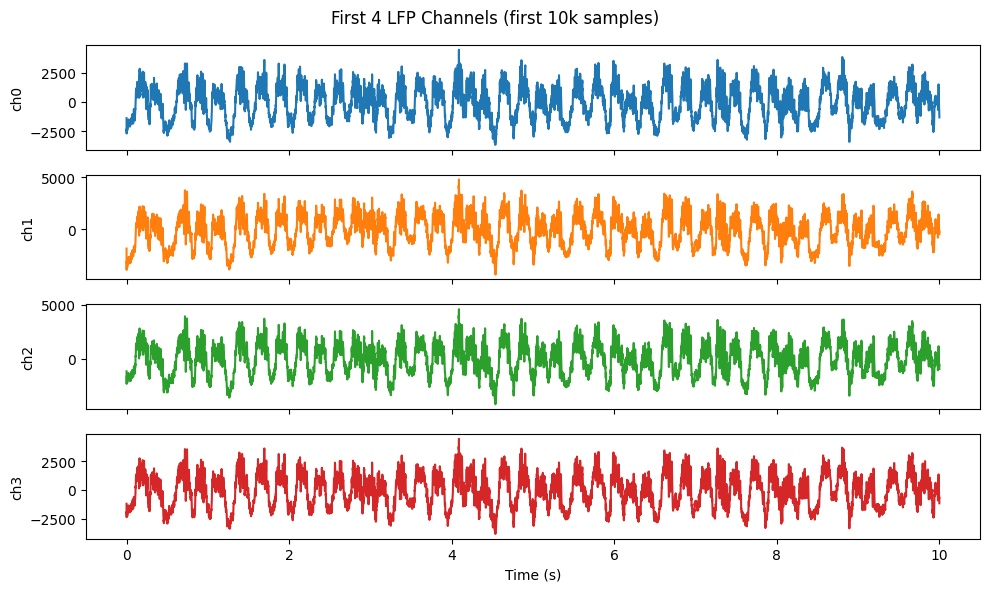

In [5]:
n_ch = 4
times = lfp_times

fig, axs = plt.subplots(n_ch, 1, figsize=(10, 6), sharex=True)
for i, ax in enumerate(axs):
    ax.plot(times, LFP.data[:n_samples, i], color='C{}'.format(i))
    ax.set_ylabel(f'ch{i}')
axs[-1].set_xlabel('Time (s)')
fig.suptitle('First 4 LFP Channels (first 10k samples)')
plt.tight_layout()
plt.show()

## Summary and Future Directions
This notebook demonstrated how to:
- Load Dandiset metadata and assets  
- Select and stream NWB data remotely using PyNWB  
- Inspect NWB file metadata and structure  
- Visualize time series data (LFP and sniff signals)  
- Create multi-channel and combined plots  

**Future analyses** could include:
- Automated sniff event detection and alignment  
- Frequency-domain analysis (e.g., power spectral density of LFP)  
- Correlation analysis between sniffing and LFP rhythms  
- Exploration of processed behavioral features (e.g., exhalation/inhalation timestamps)